<a href="https://colab.research.google.com/github/swordman08/NeuralNetworks/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)



Path to dataset files: /root/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1


In [ ]:
import pandas as pd
import os

# List all files in the dataset directory
files = os.listdir(path)
print("Files in the dataset directory:", files)


# load housing.csv
csv_file_path = os.path.join(path, "housing.csv")  # Adjust the filename if needed

# Load the dataset into a pandas DataFrame
data = pd.read_csv(csv_file_path)

# get idea of the data!
print(data.head())

Files in the dataset directory: ['housing.csv']
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error



# Handle missing values (fill missing 'total_bedrooms' with median)
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

# Convert categorical 'ocean_proximity' to one-hot encoding
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Extract two variables for the small model
small_features = data[['median_income', 'total_rooms']]
target = data['median_house_value']

# Normalize the features
scaler = MinMaxScaler()
small_features_scaled = scaler.fit_transform(small_features)

# Split the data into train and test sets
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    small_features_scaled, target, test_size=0.2, random_state=42
)

# Build a small neural network with two variables
small_model = Sequential([
    Dense(10, input_dim=2, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
small_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
small_model.fit(X_train_small, y_train_small, epochs=50, batch_size=32, verbose=0)

# Evaluate the small model
small_model_mse = mean_squared_error(y_test_small, small_model.predict(X_test_small))

# Use all features for the full model
all_features = data.drop('median_house_value', axis=1)
all_features_scaled = scaler.fit_transform(all_features)

# Split the data into train and test sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    all_features_scaled, target, test_size=0.2, random_state=42
)

# Build a full neural network with all variables
full_model = Sequential([
    Dense(64, input_dim=all_features_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
full_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the full model
full_model.fit(X_train_full, y_train_full, epochs=50, batch_size=32, verbose=0)

# Evaluate the full model
full_model_mse = mean_squared_error(y_test_full, full_model.predict(X_test_full))

# Results
results = {
    "Small Model MSE": small_model_mse,
    "Full Model MSE": full_model_mse
}

results


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step


{'Small Model MSE': 9033481814.331331, 'Full Model MSE': 5305216852.487787}

In [ ]:
# import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import root_mean_squared_error

In [ ]:
# pre process dat data!


# Handle missing values (fill missing 'total_bedrooms' with median)
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

# Convert categorical 'ocean_proximity' to one-hot encoding
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Extract two variables for the small model
small_features = data[['median_income', 'total_rooms']]
target = data['median_house_value']


# Normalize the features
scaler = MinMaxScaler()
small_features_scaled = scaler.fit_transform(small_features)

In [ ]:
# train test split, basic

# Split the data into train and test sets
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    small_features_scaled, target, test_size=0.2, random_state=42
)

In [ ]:
# baby model

small_model = Sequential([
    Dense(10, input_dim=2, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')
])


# Compile the model
small_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
small_model.fit(X_train_small, y_train_small, epochs=50, batch_size=32, verbose=0)


In [ ]:
# Evaluate the small model
small_model_rmse = root_mean_squared_error(y_test_small, small_model.predict(X_test_small))
small_model_rmse

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step


96259.3133685046

In [ ]:
# Use all features for the full model
all_features = data.drop('median_house_value', axis=1)
all_features_scaled = scaler.fit_transform(all_features)

# Split the data into train and test sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    all_features_scaled, target, test_size=0.2, random_state=42
)

In [ ]:
# full neural network with all variables
full_model = Sequential([
    Dense(64, input_dim=all_features_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
full_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the full model
full_model.fit(X_train_full, y_train_full, epochs=50, batch_size=32, verbose=0)




In [ ]:
# Evaluate the full model
full_model_rmse = root_mean_squared_error(y_test_full, full_model.predict(X_test_full))

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step


In [ ]:
# Results
results = {
    "Small Model RMSE": small_model_rmse,
    "Full Model RMSE": full_model_rmse
}

results

{'Small Model RMSE': 96259.3133685046, 'Full Model RMSE': 72886.54157952222}

In [ ]:
# Problem # 2

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
base_dir = 'dataset'  # folder containing 'Leo' and 'Not Leo'
train_dir = 'dataset_split/train'  # Output directory for training data
val_dir = 'dataset_split/val'  # Output directory for validation data

# Create train/val directories
for split_dir in [train_dir, val_dir]:
    for label in ['Leo', 'Not Leo']:
        os.makedirs(os.path.join(split_dir, label), exist_ok=True)

# Split data
for label in ['Leo', 'Not Leo']:
    folder = os.path.join(base_dir, label)
    images = os.listdir(folder)

    # Train-test split
    train_images, val_images = train_test_split(images, test_size=0.20, random_state=42)

    # Copy images to train and val folders
    for img in train_images:
        shutil.copy(os.path.join(folder, img), os.path.join(train_dir, label))
    for img in val_images:
        shutil.copy(os.path.join(folder, img), os.path.join(val_dir, label))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Preprocessing
datagen = ImageDataGenerator(rescale=1./255)

# Training Data Generator
train_gen = datagen.flow_from_directory(
    'dataset_split/train',
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary'
)

# Validation Data Generator
val_gen = datagen.flow_from_directory(
    'dataset_split/val',
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary'
)


In [ ]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, epochs = 50, validation_data=val_gen)

# Save the model
model.save('leo_classifier.h5')

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.7838 - loss: 0.6815 - val_accuracy: 0.7500 - val_loss: 0.5917
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7923 - loss: 0.5771 - val_accuracy: 0.7500 - val_loss: 0.6006
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7347 - loss: 0.6099 - val_accuracy: 0.7500 - val_loss: 0.5444
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7278 - loss: 0.5773 - val_accuracy: 0.7500 - val_loss: 0.5169
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7248 - loss: 0.5724 - val_accuracy: 0.7500 - val_loss: 0.5064
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7632 - loss: 0.4875 - val_accuracy: 0.7500 - val_loss: 0.5174
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7627 - loss: 0.4686 - val_accuracy: 0.7500 - val_loss: 0.5081
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7993 - loss: 0.4415 - val_accuracy: 0.7600 - 

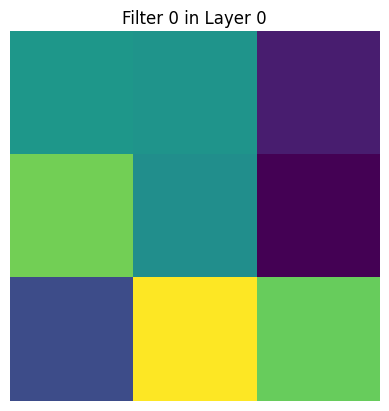

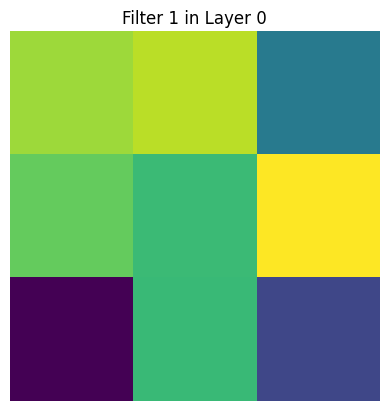

In [ ]:
def visualize_filter(layer_idx, filter_idx):
    # Get filter weights
    filter_weights = model.layers[layer_idx].get_weights()[0][:, :, :, filter_idx]
    plt.imshow(filter_weights[:, :, 0], cmap='viridis')
    plt.title(f"Filter {filter_idx} in Layer {layer_idx}")
    plt.axis('off')
    plt.show()

# Visualize filters from the first Conv2D layer
visualize_filter(layer_idx=0, filter_idx=0)  # First filter in layer 0
visualize_filter(layer_idx=0, filter_idx=1)  # Second filter in layer 0


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
Misclassified Image: Leo/005_7fe5b764.jpg


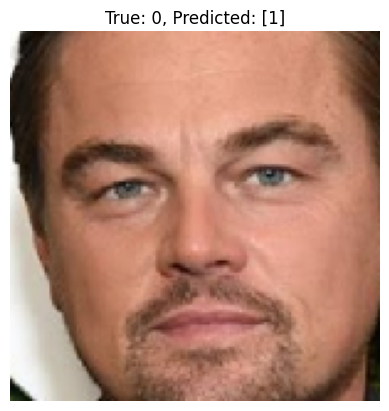

Misclassified Image: Leo/011_0549f94d.jpg


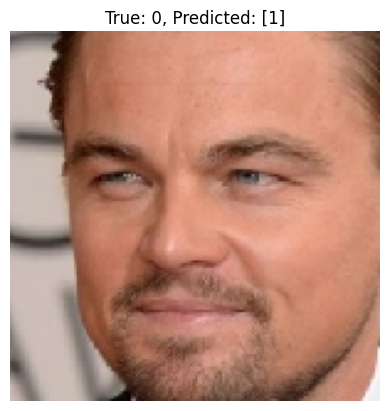

In [ ]:
import os

# Generate predictions for validation set
val_gen.reset()
predictions = model.predict(val_gen)
predicted_labels = (predictions > 0.5).astype("int32")

# Compare predictions with true labels
true_labels = val_gen.classes
filenames = val_gen.filenames

# Find misclassified images
misclassified_indices = np.where(predicted_labels.flatten() != true_labels)[0]

for idx in misclassified_indices[:2]:  # Display first two misclassified images
    print(f"Misclassified Image: {filenames[idx]}")
    img_path = os.path.join(base_dir, filenames[idx])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    plt.imshow(img_array)
    plt.title(f"True: {true_labels[idx]}, Predicted: {predicted_labels[idx]}")
    plt.axis('off')
    plt.show()


In [ ]:
# problem # 3

In [ ]:
pip install yahoo_fin


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.9 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=84e2659e2d362cc596d9288993a0c2ec724df611bda0020ff9b1334fdd71ced9
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split


# Fetch Data
ticker = "AAPL"
start_date = (datetime.now() - timedelta(days=5*365)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')

# Download data
data = yf.download(ticker, start=start_date, end=end_date)
data = data[['Close']]  # Use closing price for predictions

[*********************100%***********************]  1 of 1 completed


In [ ]:
#  Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data) - 15):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i:i+15, 0])

# Convert X and y to numpy arrays
X, y = np.array(X), np.array(y)

# Reshape X for LSTM
X = X[:, :, np.newaxis]

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=15))  # Predict next 15 days

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 15)                  │             765 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,565 (201.43 KB)

 Trainable params: 51,565 (201.43 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.2063
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0295
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0190
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0165
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0145
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0125
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0120
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0109
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0107
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0100
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0084
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0092
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0087
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0077
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0078
Epoc

In [ ]:
#  Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Reverse scaling
y_test_rescaled = scaler.inverse_transform(y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [ ]:
# Evaluate Model
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_rescaled, predictions)
mse = mean_squared_error(y_test_rescaled, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 7.356353371321065
Root Mean Squared Error: 8.993674626251952


In [ ]:
# Evaluation for Near and Far Future Predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split predictions into the near future (Days 1-7) and far future (Days 8-15)
y_test_near = y_test_rescaled[:, :7]  # Actual prices for Days 1-7
y_test_far = y_test_rescaled[:, 7:]   # Actual prices for Days 8-15
pred_near = predictions[:, :7]        # Predicted prices for Days 1-7
pred_far = predictions[:, 7:]         # Predicted prices for Days 8-15

# Calculate metrics for near and far future
mae_near = mean_absolute_error(y_test_near.flatten(), pred_near.flatten())
mae_far = mean_absolute_error(y_test_far.flatten(), pred_far.flatten())
rmse_near = np.sqrt(mean_squared_error(y_test_near.flatten(), pred_near.flatten()))
rmse_far = np.sqrt(mean_squared_error(y_test_far.flatten(), pred_far.flatten()))

# Print results
print(f"Near Future (Days 1-7): MAE = {mae_near:.2f}, RMSE = {rmse_near:.2f}")
print(f"Far Future (Days 8-15): MAE = {mae_far:.2f}, RMSE = {rmse_far:.2f}")

# Determine which is more accurate
if mae_near < mae_far:
    print("The model is more accurate in the near future (Days 1-7).")
else:
    print("The model is more accurate in the far future (Days 8-15).")


Near Future (Days 1-7): MAE = 6.15, RMSE = 7.49
Far Future (Days 8-15): MAE = 8.42, RMSE = 10.13
The model is more accurate in the near future (Days 1-7).


In [ ]:
# Simulate Investment Strategy
# Example strategy: Invest $100 when predicted stock goes up
initial_investment = 100
gains = []
for i in range(len(predictions)):
    if predictions[i, -1] > predictions[i, -2]:  # Predicted increase
        gains.append(initial_investment * (y_test_rescaled[i, -1] / y_test_rescaled[i, -2]))
    else:
        gains.append(initial_investment)

final_balance = sum(gains)
print(f"Final Investment Balance: ${final_balance:.2f}")

Final Investment Balance: $23724.80


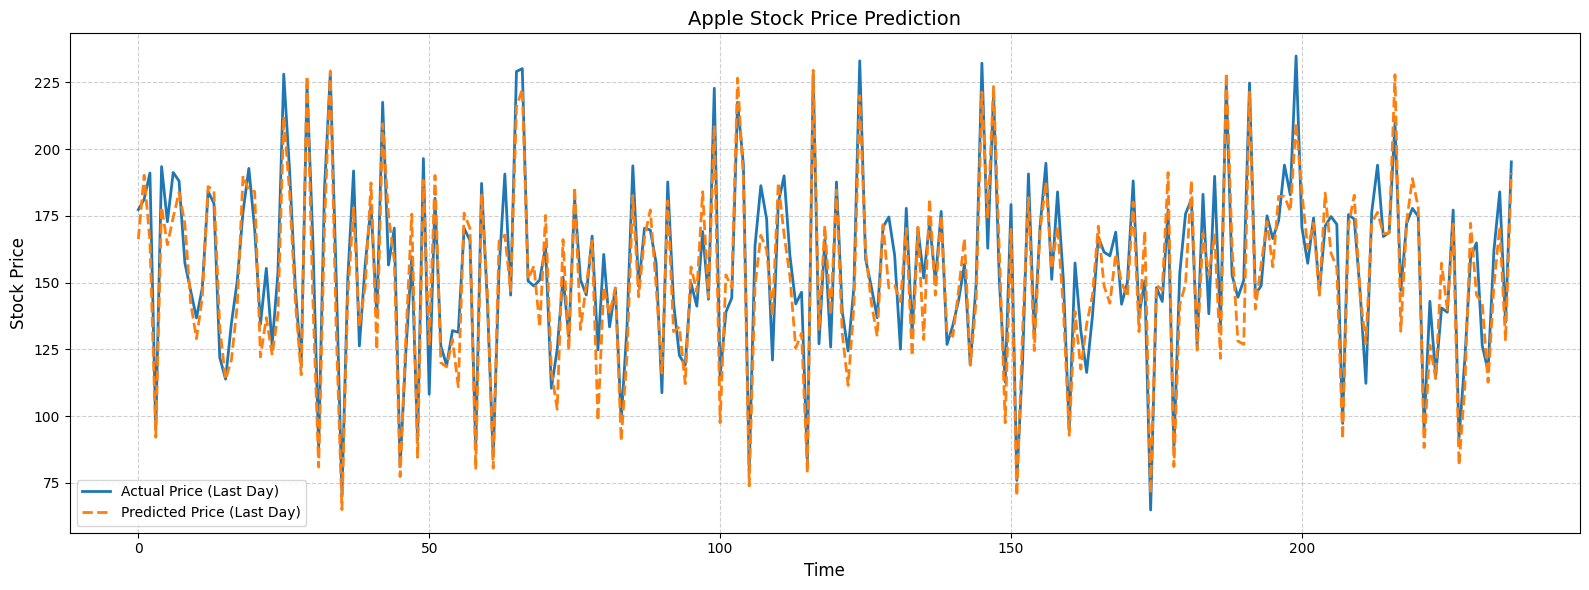

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted stock prices
plt.figure(figsize=(16, 6))
plt.plot(y_test_rescaled[:, -1], label="Actual Price (Last Day)", linewidth=2)
plt.plot(predictions[:, -1], label="Predicted Price (Last Day)", linestyle="--", linewidth=2)
plt.title("Apple Stock Price Prediction", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Stock Price", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid
plt.tight_layout()
plt.show()
